In [2]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

### Overview
Analitzem la base de dades que tenim, quins valors hi falten?

In [3]:
# Load the dataset, vehicles 
data_path = os.path.join(os.getcwd(), 'vehicles','2015_accidents_vehicles_gu_bcn_.csv')
accidents_vehicle = pd.read_csv(data_path, delimiter = ',', encoding='latin-1')
print('DataSet Vehicles - Nombre instances: {}, number of Training attributes: {}'.format(accidents_vehicle.shape[0], accidents_vehicle.shape[1]))
n_instances_vehicle=accidents_vehicle.shape[0]

# Load the dataset, persones
data_path = os.path.join(os.getcwd(), 'persones', '2015_accidents_persones_gu_bcn_.csv')
accidents_persona = pd.read_csv(data_path, delimiter = ',', encoding='latin-1')
print('DataSet Persones - Nombre instances: {}, number of Training attributes: {}'.format(accidents_persona.shape[0], accidents_persona.shape[1]))


DataSet Vehicles - Nombre instances: 19237, number of Training attributes: 25
DataSet Persones - Nombre instances: 11780, number of Training attributes: 24


In [4]:
#Veiem com és la base de dades
accidents_vehicle.head(10)


,Codi d'expedient,Codi districte,Nom districte,Codi barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia setmana,...,Hora de dia,Descripció causa vianant,Descripció tipus de vehicle,Descripció model,Descripció marca,Descripció color,Descripció carnet,Antiguitat carnet,Coordenada UTM (Y),Coordenada UTM (X)
0,2015S004912,-1,Desconegut,-1,Desconegut,-1,Desconegut,Desconegut,Dijous,Dj,...,19,No és causa del vianant,Turismo,ALMERA,NISSAN,Gris,B,36,-1,-1
1,2015S002169,-1,Desconegut,-1,Desconegut,-1,Desconegut,Desconegut,Dissabte,Ds,...,21,No és causa del vianant,Turismo,ASTRA,OPEL,Gris,B,1,-1,-1
2,2015S003045,10,Sant Martí,64,el Camp de l'Arpa del Clot,209900,Meridiana,0189 0189,Dimecres,Dc,...,19,No és causa del vianant,Turismo,SAXO,CITROEN,Blanc,B,3,"4585274,89","432115,62"
3,2015S002476,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0321 0321,Dijous,Dj,...,11,No és causa del vianant,Turismo,JAZZ,HONDA,Gris,B,2,"4585497,44","432013,01"
4,2015S009751,10,Sant Martí,64,el Camp de l'Arpa del Clot,224802,Nació,0030 0030,Dimarts,Dm,...,14,No és causa del vianant,Motocicleta,AGILITY 125,KYMCO,Negre,B,4,"4585145,10","431990,72"
5,2015S001125,10,Sant Martí,64,el Camp de l'Arpa del Clot,194406,Maragall,0023 0023,Divendres,Dv,...,17,No és causa del vianant,Turismo,COROLLA,TOYOTA,Gris,B,16,"4585270,45","431626,67"
6,2015S001125,10,Sant Martí,64,el Camp de l'Arpa del Clot,194406,Maragall,0023 0023,Divendres,Dv,...,17,No és causa del vianant,Taxi,OCTAVIA,SKODA,Negre/Groc,BTP,6,"4585270,45","431626,67"
7,2015S007041,10,Sant Martí,64,el Camp de l'Arpa del Clot,194406,Maragall,0029 0031,Dissabte,Ds,...,13,No és causa del vianant,Autobús,NL 18,MAN,Vermell,D,17,"4585336,24","431615,03"
8,2015S007294,10,Sant Martí,64,el Camp de l'Arpa del Clot,161407,Indústria,0255X0255X,Dimarts,Dm,...,14,Altres,Motocicleta,SH 100,HONDA,Blau,A,26,"4585204,89","431517,12"
9,2015S002616,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0350 0350,Dimecres,Dc,...,22,No és causa del vianant,Motocicleta,SH 150,HONDA,Gris,A1,5,"4585407,65","431582,74"


***ULL***

* Veiem que hi ha dades desconegudes o codis de barris negatius!

In [5]:
accidents_vehicle.describe()
#Així podem veure que algunes de les entrades tenen com a codi de barri -1, al tenir moltes dades, esborrarem aquests valors.

,Codi districte,Codi barri,Codi carrer,NK Any,Mes de any,Dia de mes,Hora de dia
count,19237.000000,19237.000000,19237.000000,19237.0,19237.000000,19237.000000,19237.000000
mean,4.757031,26.451682,235122.700161,2015.0,6.559339,15.936113,13.888548
std,2.970608,21.842215,185528.495278,0.0,3.473704,8.686849,5.275953
min,-1.000000,-1.000000,-1.000000,2015.0,1.000000,1.000000,0.000000
25%,2.000000,8.000000,108903.000000,2015.0,4.000000,8.000000,10.000000
50%,4.000000,19.000000,191204.000000,2015.0,6.000000,16.000000,14.000000
75%,7.000000,41.000000,316208.000000,2015.0,10.000000,23.000000,18.000000
max,10.000000,73.000000,701837.000000,2015.0,12.000000,31.000000,23.000000


In [6]:
#Mirar quins són els formats dels atributs, perquè en falten a la taula de dalt...
accidents_vehicle.dtypes

Codi d'expedient               object
Codi districte                  int64
Nom districte                  object
Codi barri                      int64
Nom barri                      object
Codi carrer                     int64
Nom carrer                     object
Num postal caption             object
Descripció dia setmana         object
Dia setmana                    object
Descripció tipus dia           object
NK Any                          int64
Mes de any                      int64
Nom mes                        object
Dia de mes                      int64
Hora de dia                     int64
Descripció causa vianant       object
Descripció tipus de vehicle    object
Descripció model               object
Descripció marca               object
Descripció color               object
Descripció carnet              object
Antiguitat carnet              object
Coordenada UTM (Y)             object
Coordenada UTM (X)             object
dtype: object

In [7]:
### Abans de transformar-ho en int hem d'eliminar els valors que són string com Desconegut
accidents_vehicle_clean = accidents_vehicle[accidents_vehicle['Antiguitat carnet'] != 'Desconegut'] 
accidents_vehicle_clean['Antiguitat carnet'] = accidents_vehicle_clean['Antiguitat carnet'].astype(int)

accidents_vehicle_clean.describe() 
### Hey! Hi ha antiguitat de carnet negativa i superior a 1000 anys???


C:\Users\toti\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Codi districte,Codi barri,Codi carrer,NK Any,Mes de any,Dia de mes,Hora de dia,Antiguitat carnet
count,16749.000000,16749.000000,16749.000000,16749.0,16749.000000,16749.000000,16749.000000,16749.000000
mean,4.771031,26.522360,237383.719147,2015.0,6.543674,15.851454,13.942504,16.348439
std,2.962758,21.782403,188544.942550,0.0,3.483570,8.674715,5.169238,16.664983
min,-1.000000,-1.000000,-1.000000,2015.0,1.000000,1.000000,0.000000,-947.000000
25%,2.000000,8.000000,109203.000000,2015.0,4.000000,8.000000,10.000000,6.000000
50%,4.000000,20.000000,191204.000000,2015.0,6.000000,16.000000,14.000000,13.000000
75%,7.000000,41.000000,318906.000000,2015.0,10.000000,23.000000,18.000000,25.000000
max,10.000000,73.000000,701837.000000,2015.0,12.000000,31.000000,23.000000,1018.000000


In [8]:
### Arreglem-ho! 
accidents_vehicle_clean = accidents_vehicle_clean[accidents_vehicle_clean['Antiguitat carnet'] > 0] 
    #Eliminem les dades amb anys de carnet negatius.
accidents_vehicle_clean = accidents_vehicle_clean[accidents_vehicle_clean['Antiguitat carnet'] < 100] 
    #I també els valors superiors a 100 anys... outliers.

In [9]:
accidents_vehicle_clean = accidents_vehicle_clean[accidents_vehicle_clean['Codi districte'] > -1] #Eliminem els districtes -1
accidents_vehicle_clean = accidents_vehicle_clean[accidents_vehicle_clean['Codi carrer'] > -1] #Eliminem els districtes -1

print('DataSet Vehicles - Nombre instances: {}, number of Training attributes: {}'.format(accidents_vehicle_clean.shape[0], 
                                                                                          accidents_vehicle.shape[1]))
print('Hem reduit', n_instances_vehicle-accidents_vehicle_clean.shape[0],'instàncies.')
accidents_vehicle_clean.describe()

DataSet Vehicles - Nombre instances: 16362, number of Training attributes: 25
Hem reduit 2875 instàncies.


,Codi districte,Codi barri,Codi carrer,NK Any,Mes de any,Dia de mes,Hora de dia,Antiguitat carnet
count,16362.000000,16362.000000,16362.000000,16362.0,16362.000000,16362.00000,16362.000000,16362.000000
mean,4.791835,26.653649,240347.341462,2015.0,6.543271,15.85668,13.923970,16.563440
std,2.960521,21.787905,187821.336191,0.0,3.488434,8.66764,5.172021,12.643791
min,1.000000,1.000000,180.000000,2015.0,1.000000,1.00000,0.000000,1.000000
25%,2.000000,8.000000,112106.000000,2015.0,4.000000,8.00000,10.000000,6.000000
50%,4.000000,20.000000,191204.000000,2015.0,6.000000,16.00000,14.000000,13.000000
75%,7.000000,41.000000,320704.000000,2015.0,10.000000,23.00000,18.000000,25.000000
max,10.000000,73.000000,701837.000000,2015.0,12.000000,31.00000,23.000000,71.000000


* Ara ja tenim l'antiguitat del carnet neta!

In [10]:
### Ara toca transformar les coordenades a un valor numeric per poder-les analitzar
accidents_vehicle_clean['Coordenada UTM (X)'] = pd.to_numeric(accidents_vehicle_clean['Coordenada UTM (X)'].astype(str).str.replace(',','.'), errors='coerce')
accidents_vehicle_clean['Coordenada UTM (Y)'] = pd.to_numeric(accidents_vehicle_clean['Coordenada UTM (Y)'].astype(str).str.replace(',','.'), errors='coerce')
accidents_vehicle_clean.describe()

,Codi districte,Codi barri,Codi carrer,NK Any,Mes de any,Dia de mes,Hora de dia,Antiguitat carnet,Coordenada UTM (Y),Coordenada UTM (X)
count,16362.000000,16362.000000,16362.000000,16362.0,16362.000000,16362.00000,16362.000000,16362.000000,1.636200e+04,16362.000000
mean,4.791835,26.653649,240347.341462,2015.0,6.543271,15.85668,13.923970,16.563440,4.583628e+06,430058.504707
std,2.960521,21.787905,187821.336191,0.0,3.488434,8.66764,5.172021,12.643791,2.390879e+03,1996.838953
min,1.000000,1.000000,180.000000,2015.0,1.000000,1.00000,0.000000,1.000000,4.575063e+06,423577.480000
25%,2.000000,8.000000,112106.000000,2015.0,4.000000,8.00000,10.000000,6.000000,4.582144e+06,428581.840000
50%,4.000000,20.000000,191204.000000,2015.0,6.000000,16.00000,14.000000,13.000000,4.583349e+06,430084.790000
75%,7.000000,41.000000,320704.000000,2015.0,10.000000,23.00000,18.000000,25.000000,4.584902e+06,431493.735000
max,10.000000,73.000000,701837.000000,2015.0,12.000000,31.00000,23.000000,71.000000,4.591123e+06,435134.980000


In [11]:
### Final check
accidents_vehicle_clean.dtypes
accidents_vehicle_clean['Nom districte'].unique()

array(['Sant Martí', 'Ciutat Vella', 'Eixample', 'Sants-Montjuïc',
       'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó',
       'Nou Barris', 'Sant Andreu'], dtype=object)

### Ara pinta millor
* Ara passem a analitzar el que tenim amb un parell de gràfics

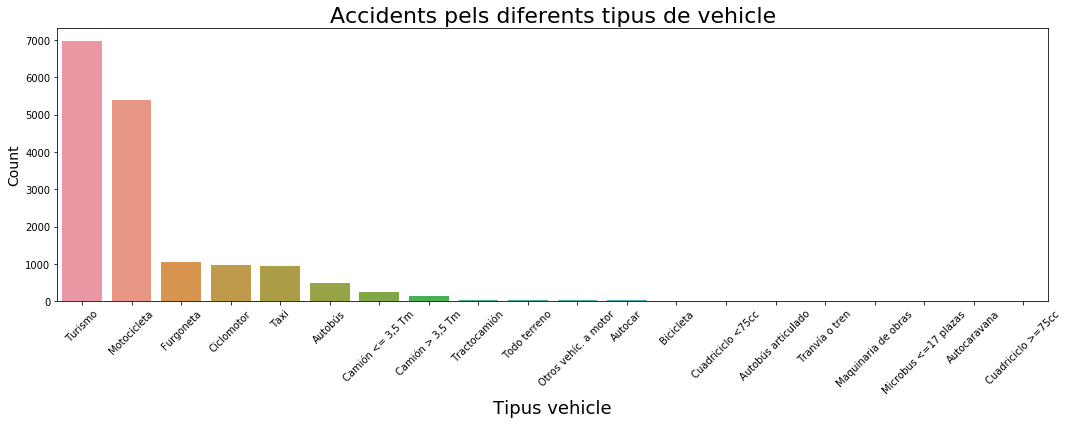

In [12]:
### Anem a veure quins son els tipus de vehicles amb més accidents.

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(x=accidents_vehicle_clean["Descripció tipus de vehicle"], 
                   ax=ax,
                   order = accidents_vehicle_clean["Descripció tipus de vehicle"].value_counts().index )
plt.xticks(rotation=45)
plt.xlabel('Tipus vehicle', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.title('Accidents pels diferents tipus de vehicle', fontsize=22)
plt.tight_layout()
plt.show()


* Com hem vist hi ha masses categories per fer un anàlisi acurat de les dades. Per tant truncarem el dataset pels vehicles que són autobusos i ignorarem la resta, que és un molt menor part.



In [13]:
select_vehicles = accidents_vehicle_clean["Descripció tipus de vehicle"].value_counts().iloc[:5].index
select_vehicles

accidents_vehicle_clean = accidents_vehicle_clean.loc[accidents_vehicle_clean["Descripció tipus de vehicle"].isin(select_vehicles)]
print('DataSet Vehicles - Nombre instances: {}, number of Training attributes: {}'.format(accidents_vehicle_clean.shape[0], accidents_vehicle_clean.shape[1]))
select_vehicles

DataSet Vehicles - Nombre instances: 15316, number of Training attributes: 25


Index(['Turismo', 'Motocicleta', 'Furgoneta', 'Ciclomotor', 'Taxi'], dtype='object')

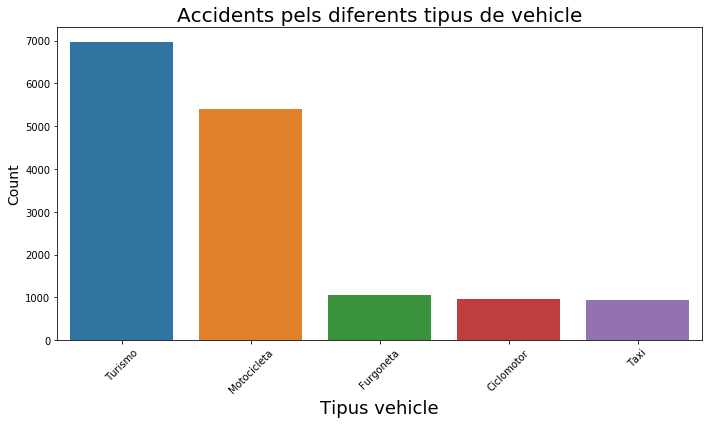

In [14]:
### Nombre accidents per any de carnet
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=accidents_vehicle_clean["Descripció tipus de vehicle"], 
                   ax=ax,
                   order = accidents_vehicle_clean["Descripció tipus de vehicle"].value_counts().index )
plt.xticks(rotation=45)
plt.xlabel('Tipus vehicle', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.title('Accidents pels diferents tipus de vehicle', fontsize=20)
plt.tight_layout()
plt.show()


* Ara l'anàlisi serà més senzill i visual.

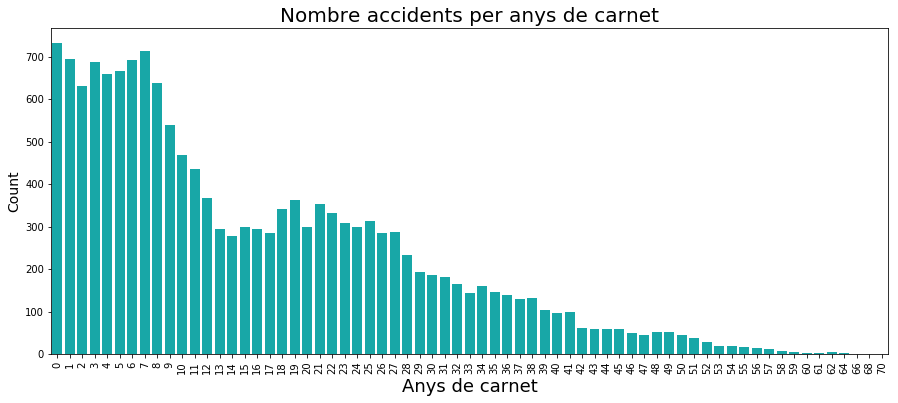

In [15]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(x=accidents_vehicle_clean["Antiguitat carnet"]-1, ### Note: No hi ha any 0, es comença des del any 1
                   color='c')                 
#                    hue=accidents_vehicle_clean["Descripció tipus de vehicle"],
plt.xticks(rotation=90)
plt.xlabel('Anys de carnet', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.title('Nombre accidents per anys de carnet', fontsize=20)
plt.show()


select_anys = accidents_vehicle_clean["Antiguitat carnet"].value_counts().iloc[:11].index
select_anys

accidents_select_anys = accidents_vehicle_clean.loc[accidents_vehicle_clean["Antiguitat carnet"].isin(select_anys)]

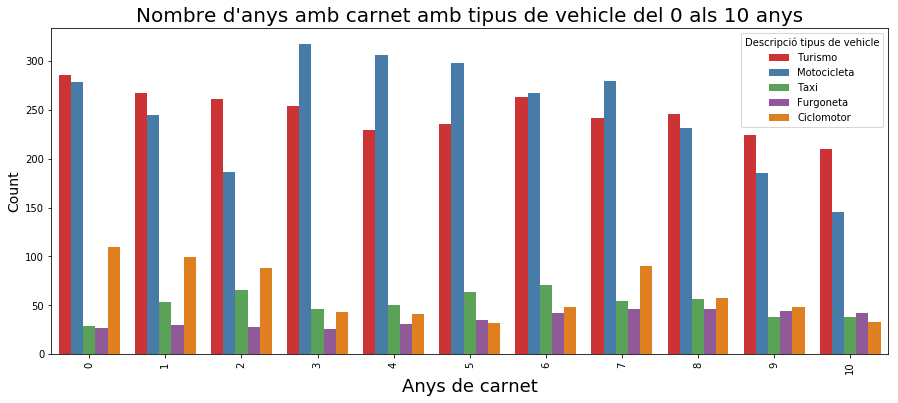

In [16]:
### Nombre accidents per any de carnet. 
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(x=accidents_select_anys["Antiguitat carnet"]-1, ### Note: No hi ha any 0, es comença des del any 1
                   ax=ax,
                   hue=accidents_vehicle_clean["Descripció tipus de vehicle"],
                   palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Anys de carnet', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.title('Nombre d\'anys amb carnet amb tipus de vehicle del 0 als 10 anys', fontsize=20)
plt.show()

In [17]:
### 

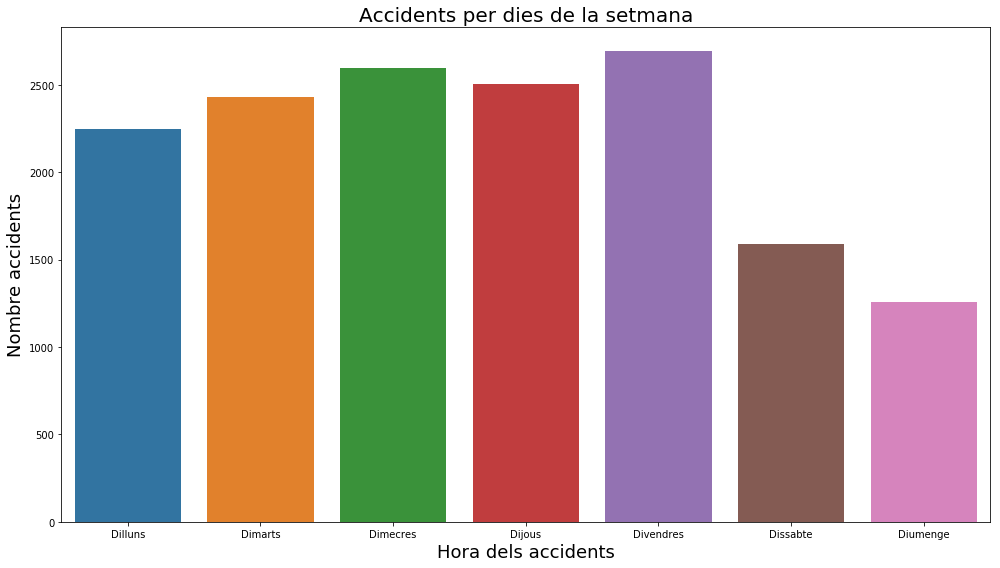

In [18]:
###  Quin és el dia amb més accidents? ###
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x=accidents_vehicle_clean['Descripció dia setmana'], 
                   ax=ax, 
                   order=['Dilluns','Dimarts','Dimecres','Dijous','Divendres','Dissabte','Diumenge'])
plt.xlabel('Hora dels accidents', fontsize=18)
plt.ylabel('Nombre accidents', fontsize=18)
plt.title('Accidents per dies de la setmana', fontsize=20)
plt.tight_layout()
plt.show()

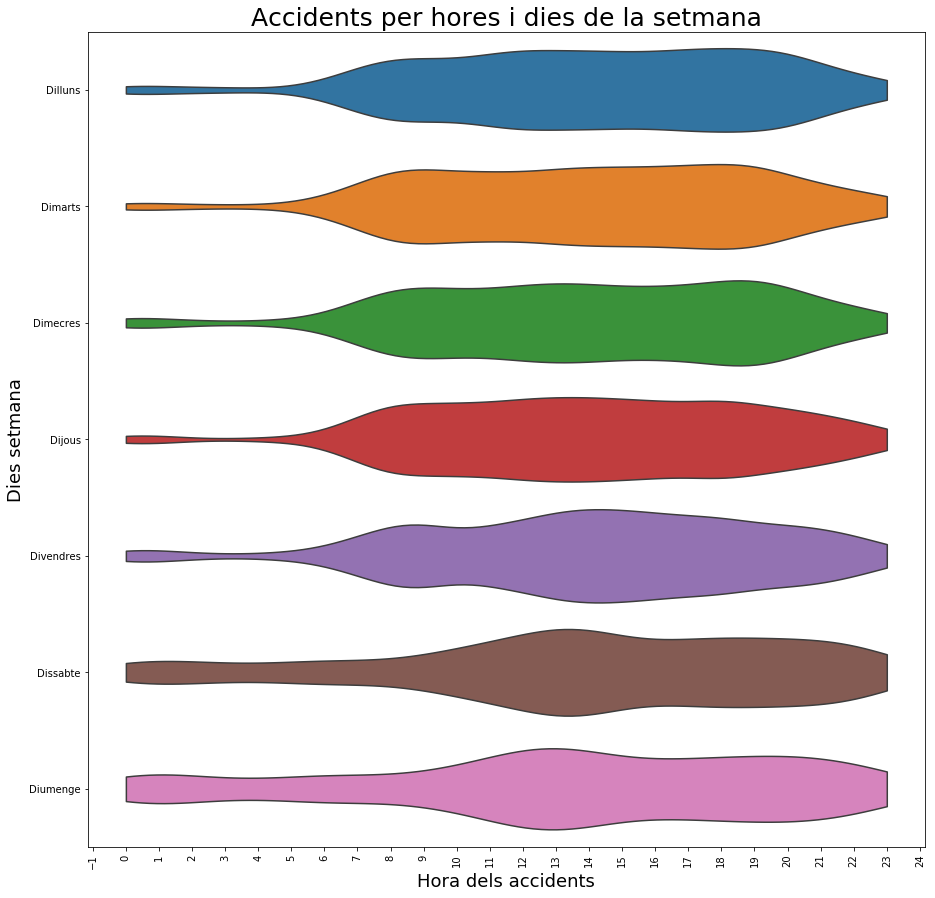

In [19]:
### Visualitzem-ho per hores i per dies de a setmana ara ###
fig, ax = plt.subplots(figsize=(15,15))
sns.violinplot(y=accidents_vehicle_clean['Descripció dia setmana'], 
               x=accidents_vehicle_clean["Hora de dia"], 
               cut=0, 
               order=['Dilluns','Dimarts','Dimecres','Dijous','Divendres','Dissabte','Diumenge'],
               inner=None)
plt.xticks(rotation=90)
plt.xlabel('Hora dels accidents', fontsize=18)
plt.ylabel('Dies setmana', fontsize=18)
plt.title('Accidents per hores i dies de la setmana', fontsize=25)
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

In [20]:
# sns.heatmap(accidents_vehicle_clean[["Hora de dia"]])

# # Create a figure with 6 plot areas
# fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# # Everything sarts with a Scatterplot
# axes[0].set_title('Scatterplot')
# axes[0].plot(x, y, 'ko')
# # As you can see there is a lot of overplottin here!
 
# # Thus we can cut the plotting window in several hexbins
# nbins = 20
# axes[1].set_title('Hexbin')
# axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# # 2D Histogram
# axes[2].set_title('2D Histogram')
# axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
# k = kde.gaussian_kde(data.T)
# xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
# zi = k(np.vstack([xi.flatten(), yi.flatten()]))


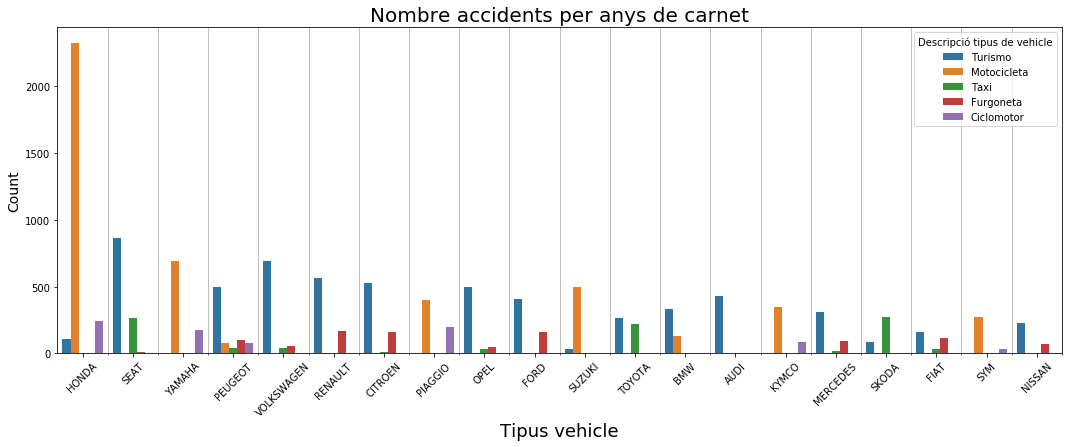

In [21]:
num_marca=20 ### Analitzar les 20 marques amb més accidents a la ciutat.
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x=accidents_vehicle_clean['Descripció marca'], 
                   ax=ax,
                   order = accidents_vehicle_clean["Descripció marca"].value_counts().iloc[:num_marca].index,
                   hue=accidents_vehicle_clean["Descripció tipus de vehicle"])
plt.gca().set_xticks([i + 0.5 for i in range(num_marca)], minor=True)
plt.grid(True, which = 'minor')
plt.xticks(rotation=45)
plt.xlabel('Tipus vehicle', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.title('Nombre accidents per anys de carnet', fontsize=20)
plt.show()

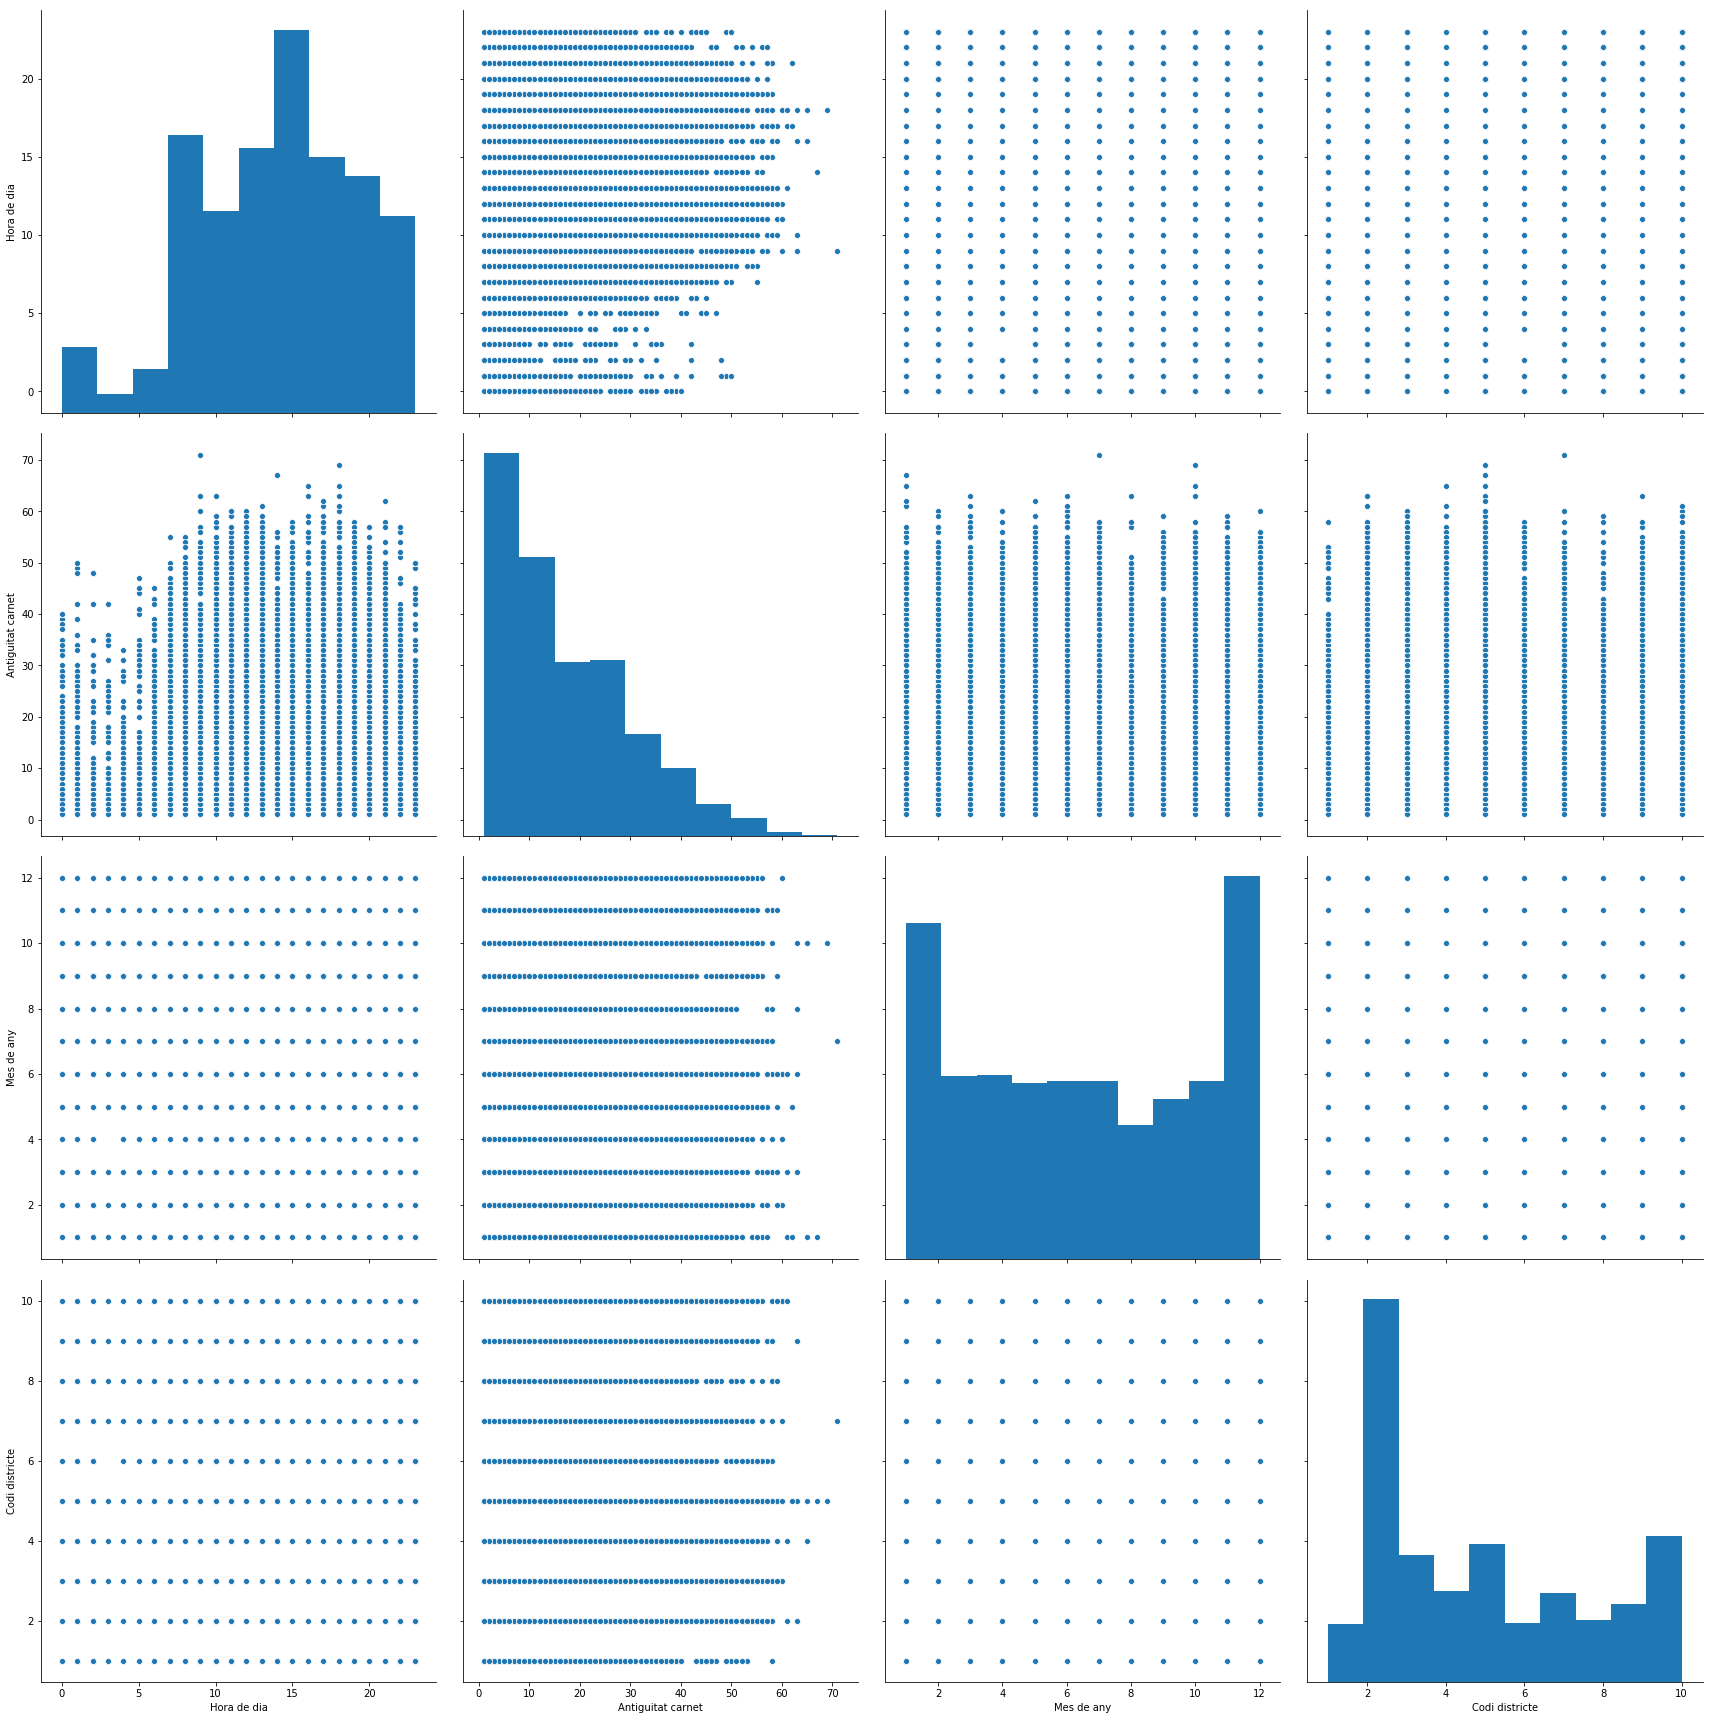

In [22]:
analitzar=['Hora de dia','Antiguitat carnet', 'Mes de any','Codi districte']
sns.pairplot(accidents_vehicle_clean[analitzar],height=6)
plt.show()
#Analitazr dades string

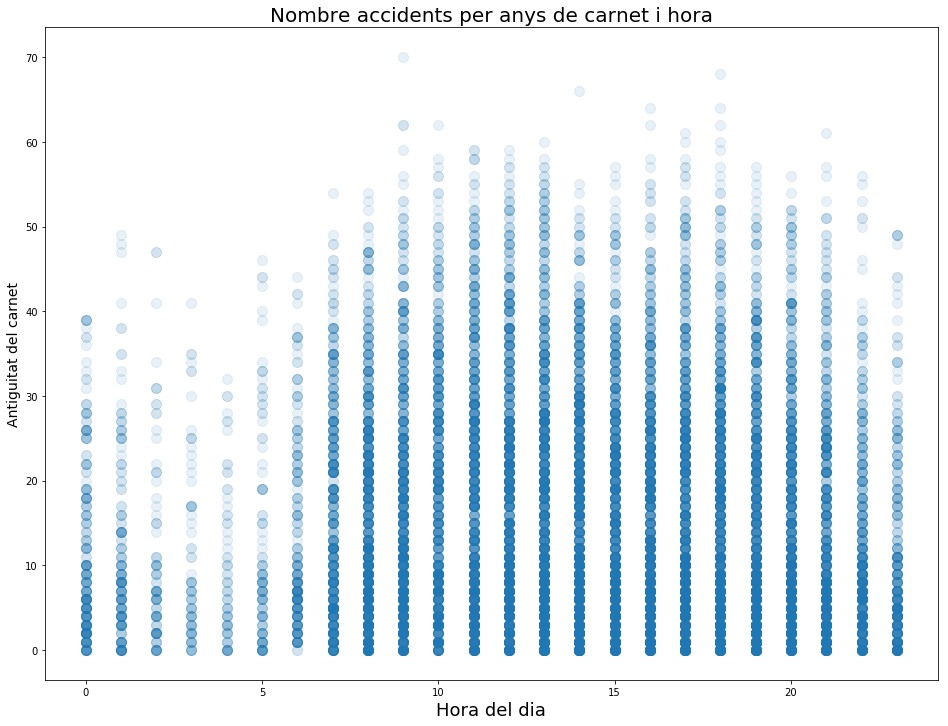

In [23]:
fig, ax = plt.subplots(figsize=(16,12))

plt.scatter(accidents_vehicle_clean['Hora de dia'],accidents_vehicle_clean['Antiguitat carnet']-1, 
            s=100, alpha=0.1)
plt.xlabel('Hora del dia', fontsize=18)
plt.ylabel('Antiguitat del carnet', fontsize=14)
plt.title('Nombre accidents per anys de carnet i hora', fontsize=20)
plt.show()


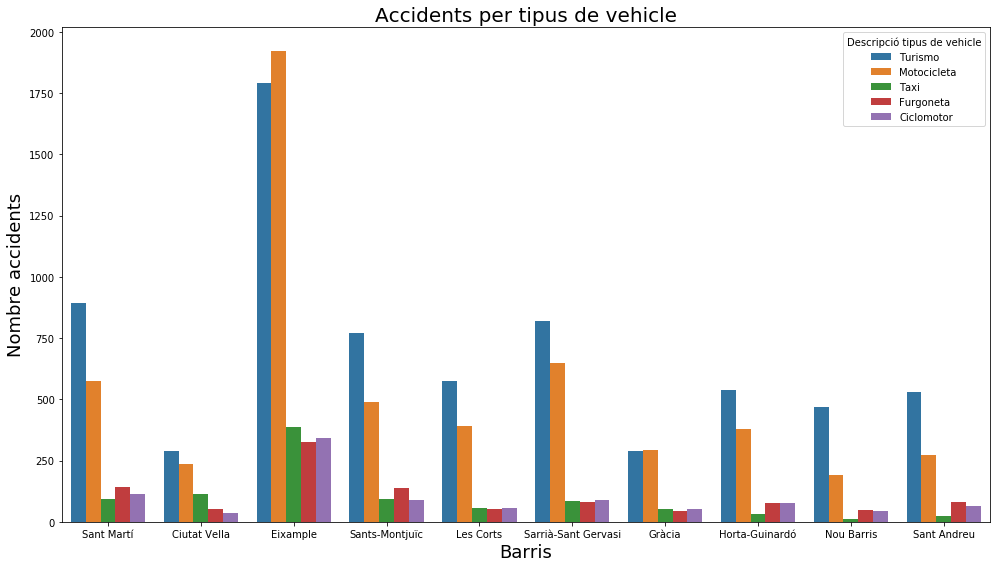

In [24]:
###  Quin és el dia amb més accidents? ###
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x=accidents_vehicle_clean['Nom districte'],
                   hue=accidents_vehicle_clean["Descripció tipus de vehicle"])

plt.xlabel('Barris', fontsize=18)
plt.ylabel('Nombre accidents', fontsize=18)
plt.title('Accidents per tipus de vehicle', fontsize=20)
plt.tight_layout()
plt.show()

C:\Users\toti\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


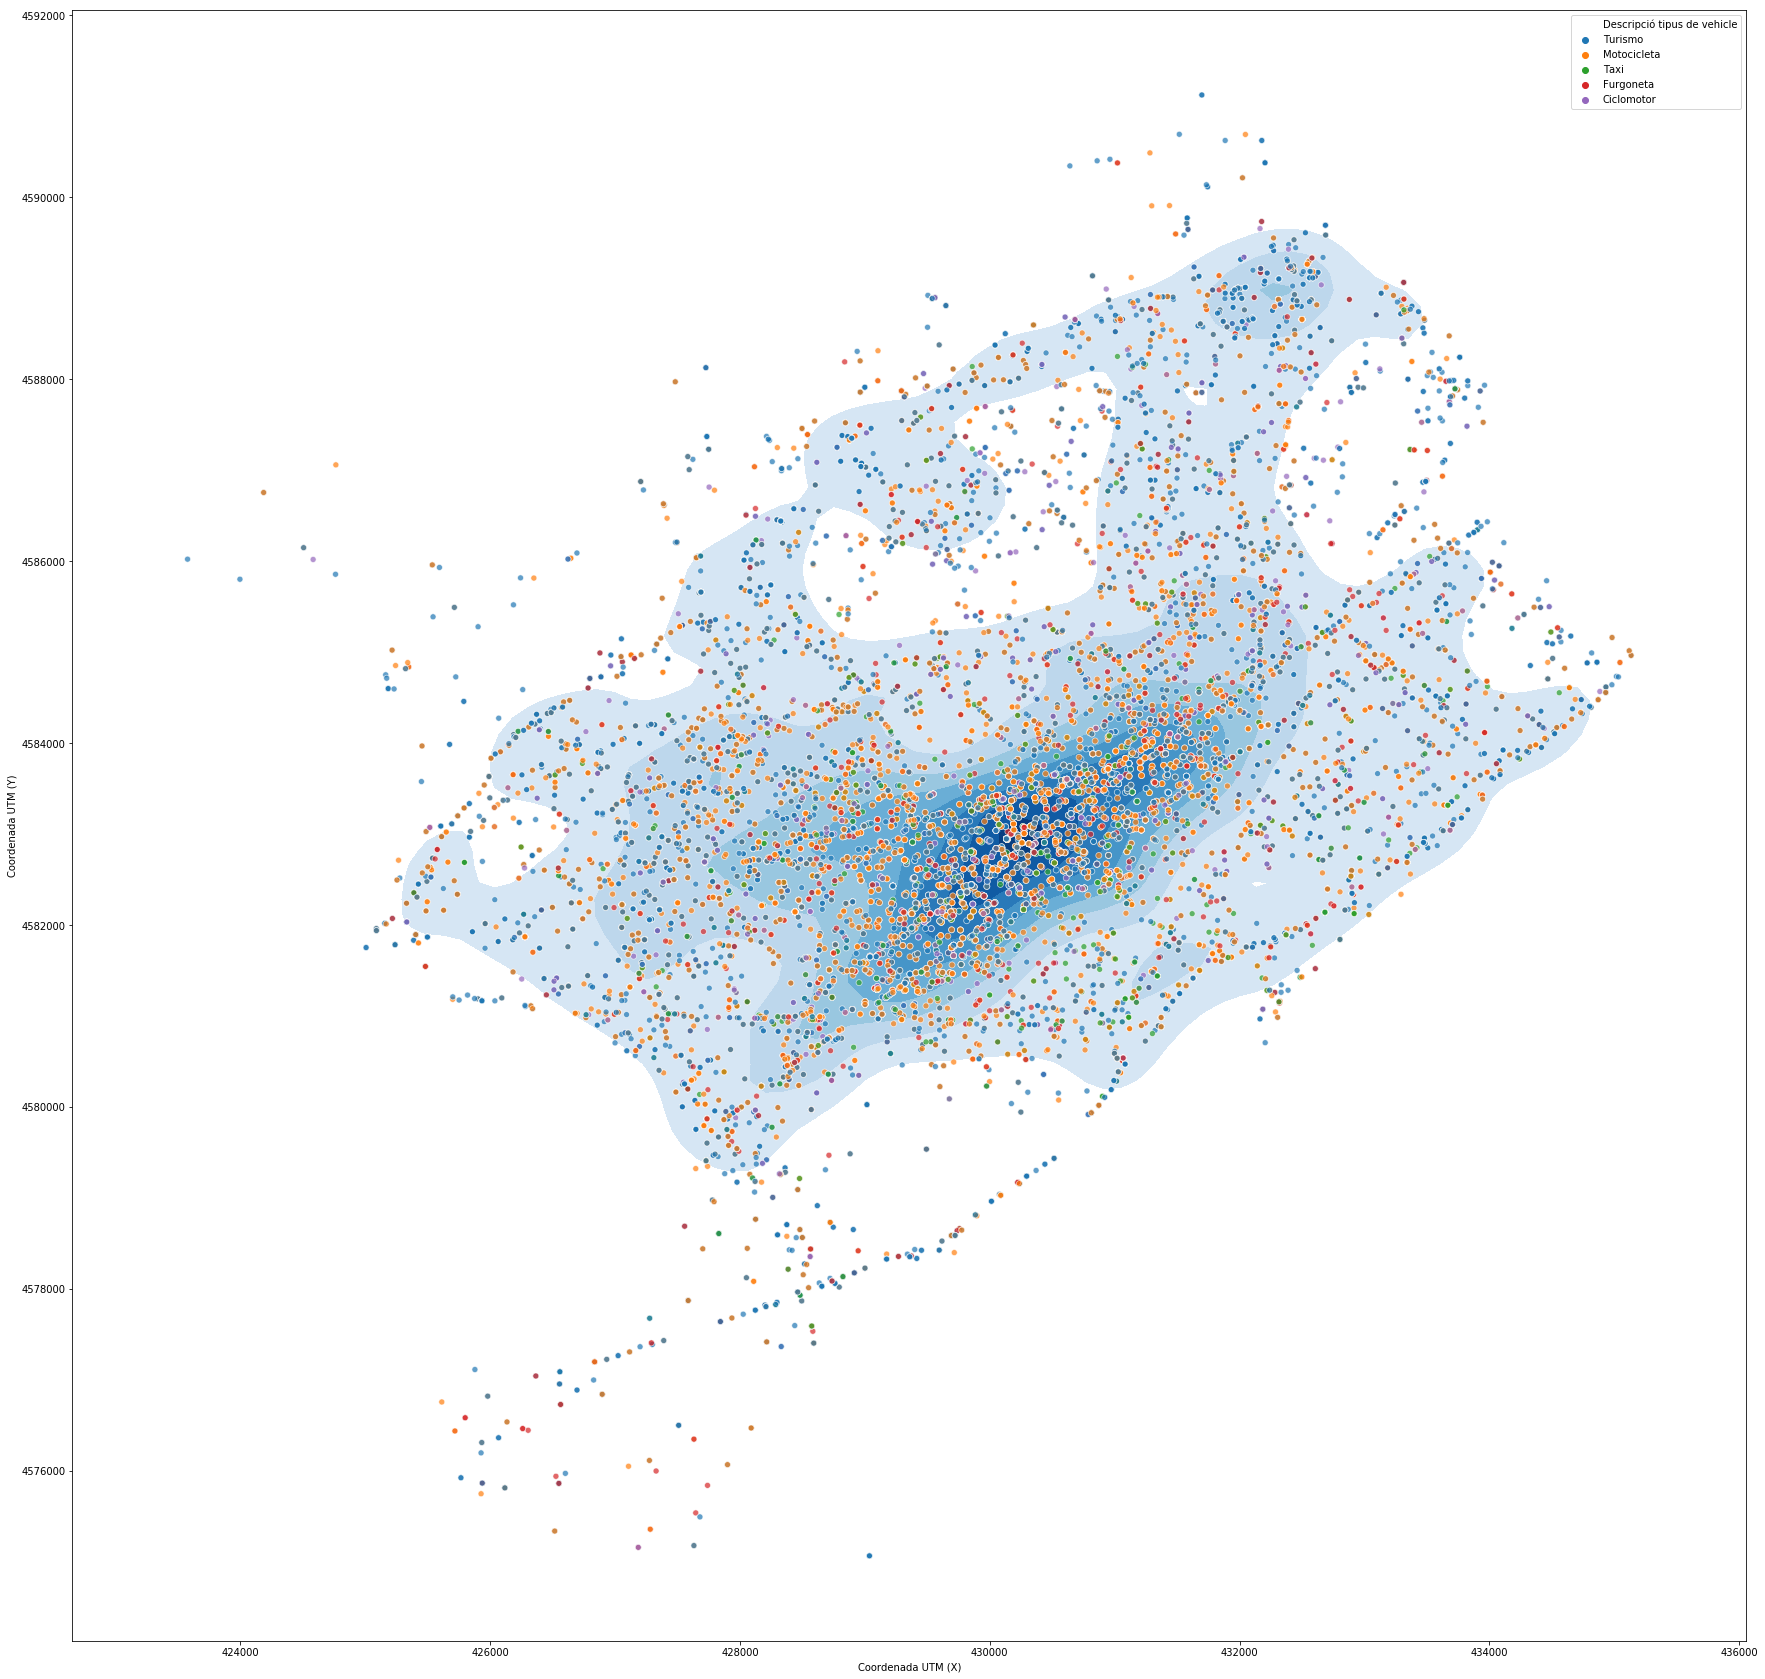

In [25]:
fig = plt.figure(figsize=(30,30))
fig.add_subplot(1,1,1)
sns.kdeplot(accidents_vehicle_clean['Coordenada UTM (X)'], accidents_vehicle_clean['Coordenada UTM (Y)'], 
            cmap="Blues", shade=True, shade_lowest=False )
sns.scatterplot(x=accidents_vehicle_clean['Coordenada UTM (X)'], y=accidents_vehicle_clean['Coordenada UTM (Y)'], 
                alpha=0.7,
                hue = accidents_vehicle_clean["Descripció tipus de vehicle"])

plt.show()

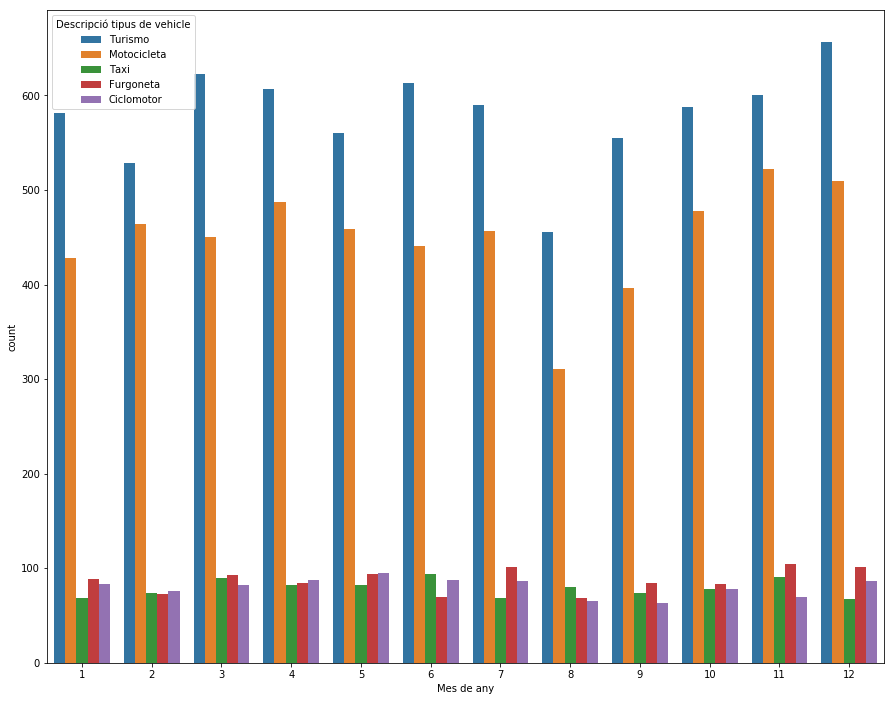

In [26]:
fig = plt.figure(figsize=(15,12))

sns.countplot(accidents_vehicle_clean['Mes de any'], 
              hue=accidents_vehicle_clean["Descripció tipus de vehicle"])
# accidents_vehicle_clean['Nom districte'].count()